In [69]:
import pandas as pd
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [70]:
#Drop rows where Life expectancy is null
df.dropna(subset=['Life expectancy '],axis=0, inplace=True)
df['Life expectancy '].isnull().sum()

0

In [71]:
#Impute Alcohol column
import numpy as np

# Get list of countries with nulls in 'Alcohol'
countriesAl_with_nulls = df[df['Alcohol'].isnull()]['Country'].unique()

# Impute missing values with country-specific mean
for country in countriesAl_with_nulls:
    country_mean = df.loc[df['Country'] == country, 'Alcohol'].mean()
    df.loc[(df['Country'] == country) & (df['Alcohol'].isnull()), 'Alcohol'] = country_mean
m=df['Alcohol'].mean()
df['Alcohol'].fillna(m,inplace=True)
df['Alcohol'].isnull().sum()

0

In [72]:
#Impute Hepatitis B column
import numpy as np

# Get list of countries with nulls in 'Hepatitis B'
countries_with_nulls = df[df['Hepatitis B'].isnull()]['Country'].unique()

# Impute missing values with country-specific mean
for country in countries_with_nulls:
    country_mean = df.loc[df['Country'] == country, 'Hepatitis B'].mean()
    df.loc[(df['Country'] == country) & (df['Hepatitis B'].isnull()), 'Hepatitis B'] = country_mean
df['Hepatitis B'].isnull().sum()
m=df['Hepatitis B'].mean()
df['Hepatitis B'].fillna(m,inplace=True)
df['Hepatitis B'].isnull().sum()

0

In [73]:
#Impute BMI column
countriesBMI_with_nulls = df[df[' BMI '].isnull()]['Country'].unique()

# Impute missing values with country-specific mean
for country in countriesBMI_with_nulls:
    country_mean = df.loc[df['Country'] == country, ' BMI '].mean()
    df.loc[(df['Country'] == country) & (df[' BMI '].isnull()), ' BMI '] = country_mean
m=df[' BMI '].mean()
df[' BMI '].fillna(m,inplace=True)
df[' BMI '].isnull().sum()

0

In [74]:
#Impute Polio Column
countriesPolio_with_nulls = df[df['Polio'].isnull()]['Country'].unique()

# Impute missing values with country-specific mean
for country in countriesPolio_with_nulls:
    country_mean = df.loc[df['Country'] == country, 'Polio'].mean()
    df.loc[(df['Country'] == country) & (df['Polio'].isnull()), 'Polio'] = country_mean
m=df['Polio'].mean()
df['Polio'].fillna(m,inplace=True)
df['Polio'].isnull().sum()

0

In [75]:
#Imputation for remaining columns with null values
colnames=['Total expenditure','Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
'Income composition of resources', 'Schooling']

for c in colnames:
    countries_with_nulls = df[df[c].isnull()]['Country'].unique()

# Impute missing values with country-specific mean
for country in countries_with_nulls:
    country_mean = df.loc[df['Country'] == country, c].mean()
    df.loc[(df['Country'] == country) & (df[c].isnull()), c] = country_mean
for c in colnames:
    m=df[c].mean()
    df[c].fillna(m,inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Plynomial Regression

In [76]:
df_reg=df.select_dtypes(include='number')
df_reg.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [77]:
df_reg = df_reg.drop('Year', axis=1)
df_reg.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [78]:
x_data=df_reg 

In [79]:
x_data = df_reg.drop('Life expectancy ', axis=1)
x_data.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [80]:
y_data=df_reg['Life expectancy ']

In [81]:
y_data.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

## Split dataset into training and test datasets

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

## Pipelines

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
nput=[('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2)),('Model',LinearRegression())]
pipe=Pipeline(nput)
pipe.fit(x_train,y_train)
yhat=pipe.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yhat)

12.124975264688414

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.8685361991087684

## Prediction  Visualization

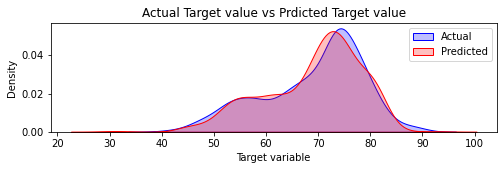

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,2))
sns.kdeplot(y_test,label="Actual", fill=True,color="blue")
sns.kdeplot(yhat,label="Predicted", fill=True,color="red")
plt.xlabel('Target variable')
plt.ylabel('Density') 
plt.title("Actual Target value vs Prdicted Target value")
plt.legend()
plt.show()

## Preprocessing

In [87]:
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()
SCALE.fit(x_data)
x_scale=SCALE.transform(x_data)

## Split dataset into training and test datasets

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_data,test_size=0.3,random_state=0)

## Model Evaluation using K_fold

In [89]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x_scale,y_data,cv=4)
np.mean(scores)

0.7894228966658976

In [90]:
scores = cross_val_score(lr, x_scale, y_data, cv=4, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -scores
average_mse = np.mean(mse_scores)

print("Cross-validated Mean Squared Error:", average_mse)

Cross-validated Mean Squared Error: 18.87267973476518


## Prediction using Cross Validation

In [91]:
from sklearn.model_selection import cross_val_predict
y_predict=cross_val_predict(lr,x_scale,y_data,cv=4)

## Prediction  Visualization

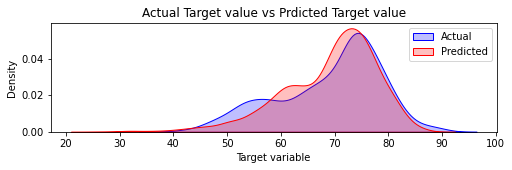

In [92]:
plt.figure(figsize=(8,2))
sns.kdeplot(y_test,label="Actual", fill=True,color="blue")
sns.kdeplot(y_predict,label="Predicted", fill=True,color="red")
plt.xlabel('Target variable')
plt.ylabel('Density') 
plt.title("Actual Target value vs Prdicted Target value")
plt.legend()
plt.show()

# Polynomial Model

## Finding the best order using R square

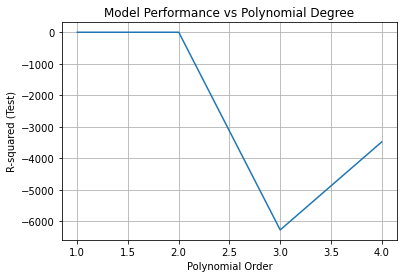

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train)
    x_test_pr=pr.fit_transform(x_test)
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))
plt.plot(order,Rsqu_test)
plt.xlabel("Polynomial Order")
plt.ylabel("R-squared (Test)")
plt.title("Model Performance vs Polynomial Degree")
plt.grid(True)
plt.show()

In [94]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(x_train)
x_test_pr1=pr1.fit_transform(x_test)
poly1=LinearRegression()
poly1.fit(x_train_pr1,y_train)
yhat_test=poly1.predict(x_test_pr1)

## Refinement (change the parameter Alpha)

In [168]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=10)
RigeModel.fit(x_train_pr1,y_train)
yhat_test=RigeModel.predict(x_test_pr1)
print("Predicted:",yhat_test[0:4])
print("Test set:",y_test[0:4].values)
RigeModel.score(x_test_pr1,y_test)

Predicted: [65.89049808 53.30440155 57.60577163 75.28111486]
Test set: [65.1 56.2 54.  75.8]


0.9092099670488221

In [169]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yhat_test)

8.37361232788381

## Grid Search

In [170]:
from sklearn.model_selection  import GridSearchCV
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
RR=Ridge()
Grid1=GridSearchCV(RR,parameters1,cv=7)
Grid1.fit(x_train_pr1,y_train)
best_alpha=Grid1.best_params_['alpha']
best_ridge_model=Ridge(alpha=best_alpha)
best_ridge_model.fit(x_train_pr1,y_train)
yhat_test=best_ridge_model.predict(x_test_pr1)
best_ridge_model.score(x_test_pr1,y_test)

0.9047866045572792

In [ ]:
best_alpha

100

In [108]:
Grid1.best_estimator_

Ridge(alpha=100)

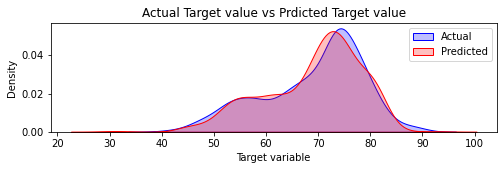

In [109]:
plt.figure(figsize=(8,2))
sns.kdeplot(y_test,label="Actual", fill=True,color="blue")
sns.kdeplot(yhat,label="Predicted", fill=True,color="red")
plt.xlabel('Target variable')
plt.ylabel('Density') 
plt.title("Actual Target value vs Prdicted Target value")
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yhat_test)

8.78158136904276

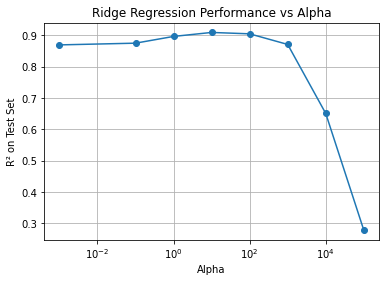

In [137]:
import matplotlib.pyplot as plt

alphas = [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]
scores = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(x_train_pr1, y_train)
    scores.append(model.score(x_test_pr1, y_test))

plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² on Test Set')
plt.title('Ridge Regression Performance vs Alpha')
plt.grid(True)
plt.show()

# Life expectancy of unknown person

In [167]:
import pandas as pd
import numpy as np

# Step 1: Prepare the input data
new_data = pd.DataFrame([[
    263.0, 62, 0.01, 71.279624, 65.0, 1154, 19.1, 83, 6.0, 8.16, 65.0, 0.1,
    584.25921, 33736494.0, 17.2, 17.3, 0.479, 10.1
]])

SCALE.fit(new_data)
new_data=SCALE.transform(new_data)

# Step 2: Transform the input using the same PolynomialFeatures
new_data_poly = pr1.transform(new_data)

# Step 3: Predict using the trained Ridge model
predicted_life_expectancy = best_ridge_model.predict(new_data_poly)

print("Predicted Life Expectancy:", predicted_life_expectancy[0])

Predicted Life Expectancy: 68.65761549357339


# Multiple Linear Regression

In [157]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_data, y_data)
yhat=lr.predict(x_data)
print(lr.intercept_)
print(lr.coef_)

54.05741982766602
[-2.02443622e-02  1.02476002e-01  1.36161512e-01  1.64807529e-04
 -4.26692374e-04 -2.13853499e-05  4.34690261e-02 -7.63994149e-02
  2.64208280e-02  7.80107956e-02  3.52073314e-02 -4.71597235e-01
  3.27889063e-05  3.21774954e-10 -8.37148849e-02  2.10022673e-03
  5.82952498e+00  6.71551437e-01]


In [158]:
lr.score(x_data, y_data)

0.8178678774803126

In [153]:
mean_squared_error(y_data,yhat)

16.51447938035409

## Visual Evaluation For multiple linear Regresssion

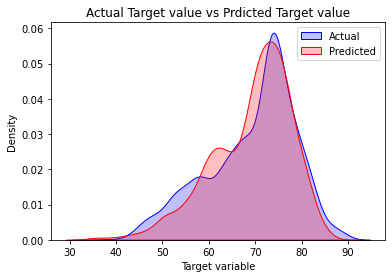

In [154]:
sns.kdeplot(y_data,label="Actual", fill=True,color="blue")
sns.kdeplot(yhat,label="Predicted", fill=True,color="red")
plt.xlabel('Target variable')
plt.ylabel('Density') 
plt.title("Actual Target value vs Prdicted Target value")
plt.legend()
plt.show()

In [159]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat=lr.predict(x_test)
print(lr.intercept_)
print(lr.coef_)

69.13336458493133
[-2.50673944e+00  1.28192210e+01  5.69513593e-01  2.76822472e-01
  7.77681192e-03 -3.10098193e-01  7.50309864e-01 -1.31477466e+01
  5.67232664e-01  2.82379767e-01  9.42138945e-01 -2.37550431e+00
  5.74547787e-01  8.48519195e-02 -6.14979711e-01  2.50473637e-01
  1.20475525e+00  2.05292429e+00]


In [160]:
lr.score(x_test, y_test)

0.8220228551889152

In [161]:
mean_squared_error(y_test,yhat)

16.41492535500094

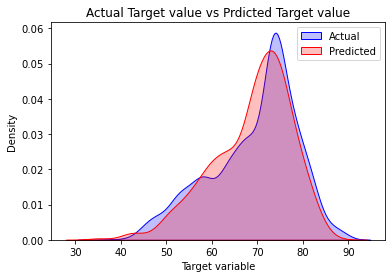

In [162]:
sns.kdeplot(y_data,label="Actual", fill=True,color="blue")
sns.kdeplot(yhat,label="Predicted", fill=True,color="red")
plt.xlabel('Target variable')
plt.ylabel('Density') 
plt.title("Actual Target value vs Prdicted Target value")
plt.legend()
plt.show()

In [163]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [164]:
df.to_csv("Clean Life Expectancy Data.csv")